1. Возьмите датасет Mortality and Water Hardness
www.kaggle.com...r-hardness           

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.                 

2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?                    

Построить точечный график            
Рассчитать коэффициенты корреляции Пирсона и Спирмена               
Построить модель линейной регрессии                
Рассчитать коэффициент детерминации                      
Вывести график остатков                     
3 Задание.                        
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?                    

Разделить данные на 2 группы                 
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности                 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('water.csv')

In [53]:
df.head(61)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

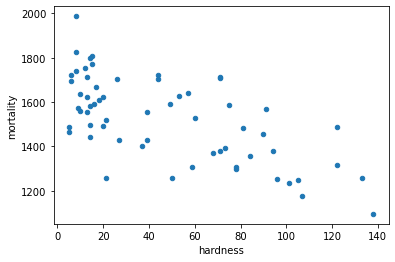

In [51]:
#визуализация взаимосвязи жесткости воды и смертности в городах Англии и Уэльса. Смертность выше тем, чем ниже жесткость воды.
df.plot(kind='scatter', x='hardness', y='mortality')

In [21]:
# взаимосвязь обратная отрицательная
display(df.corr())
display(df.corr(method = 'spearman'))

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.077133,0.123075
mortality,0.077133,1.000000,-0.654849
hardness,0.123075,-0.654849,1.000000


,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.063011,0.112263
mortality,0.063011,1.000000,-0.631665
hardness,0.112263,-0.631665,1.000000


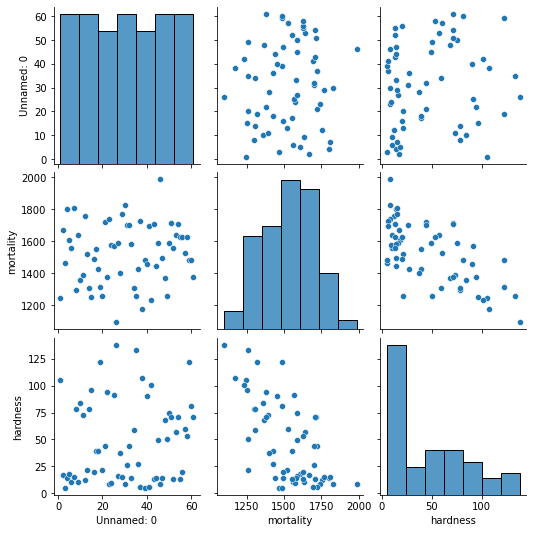

In [18]:
sns.pairplot(df)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
X = df[['hardness']]
y = df['mortality']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21)

In [57]:
X_train.shape

(42, 1)

In [58]:
y_train.shape

(42,)

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [60]:
model.coef_

array([-3.38929483])

In [61]:
model.intercept_

1678.9877987015977

In [62]:
y_pred = model.predict(X_test)
y_pred

array([1648.4841452 , 1438.34786553, 1546.8053002 , 1651.87344003,
       1662.04132453, 1607.8126072 , 1529.85882603, 1414.62280169,
       1628.1483762 , 1634.92696587, 1360.39408436, 1370.56196886,
       1624.75908137, 1631.53767103, 1353.61549469, 1590.86613303,
       1499.35517253, 1631.53767103, 1638.3162607 ])

<AxesSubplot:xlabel='hardness', ylabel='остатки'>

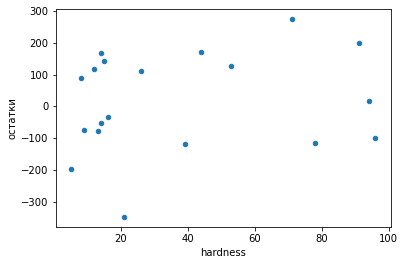

In [68]:
#остатки
res_df = X_test.copy()
res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df['остатки'] = res_df['y_test'] - res_df['y_pred']
res_df
res_df.plot(kind='scatter', x='hardness', y ='остатки')

In [63]:
model.score(X_test, y_test) #коэффициент детерминации низкий

0.17545378125409328

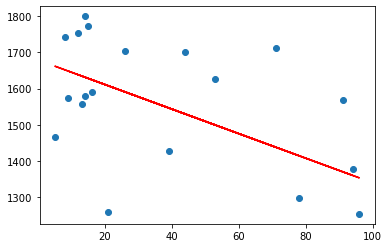

In [41]:
# линия регрессии
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

В целом можно сделать вывод, что чем меньше жесткость воды, тем больше смертность в городах Англии и Уэльса.

3 Задание.                        
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?                    

Разделить данные на 2 группы                 
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности     

In [72]:
df_south = df.loc[df.location == 'South']
df_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

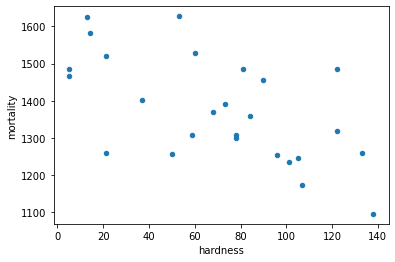

In [73]:
#визуализация взаимосвязи жесткости воды и смертности в южных городах. 
df_south.plot(kind='scatter', x='hardness', y='mortality')

In [75]:
# взаимосвязь обратная отрицательная
display(df_south.corr())
display(df_south.corr(method = 'spearman'))

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.396333,-0.005337
mortality,0.396333,1.000000,-0.602153
hardness,-0.005337,-0.602153,1.000000


,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,0.354591,-0.013685
mortality,0.354591,1.000000,-0.595723
hardness,-0.013685,-0.595723,1.000000


In [90]:
A = df_south[['hardness']]
b = df_south['mortality']

In [91]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.30, random_state=21)

In [92]:
A_train.shape

(18, 1)

In [93]:
b_train.shape

(18,)

In [94]:
model = LinearRegression()
model.fit(A_train, b_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [95]:
model.coef_

array([-2.3940506])

In [96]:
model.intercept_

1543.0810522081174

In [101]:
b_pred = model.predict(A_test)
b_pred

array([1531.11079921, 1380.28561148, 1251.00687913, 1492.80598963,
       1313.25219471, 1423.37852226, 1511.95839442, 1454.50118005])

In [102]:
model.score(A_test, b_test) #коэффициент детерминации низкий

0.07202837647977056

<AxesSubplot:xlabel='hardness', ylabel='остатки'>

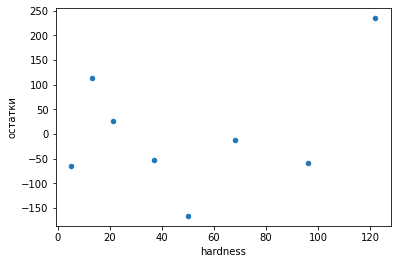

In [104]:
#остатки
res_df = A_test.copy()
res_df['b_pred'] = b_pred
res_df['b_test'] = b_test
res_df['остатки'] = res_df['b_test'] - res_df['b_pred']
res_df
res_df.plot(kind='scatter', x ='hardness', y ='остатки')

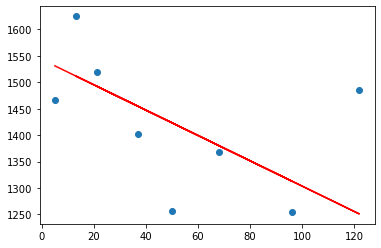

In [105]:
# линия регрессии
plt.scatter(A_test, b_test)
plt.plot(A_test, b_pred, c='r')

В южных городах Англии и Уэльса это преположение не совсем верно. Смертность больше при средней жесткости воды.

In [106]:
df_north = df.loc[df.location == 'North']
df_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

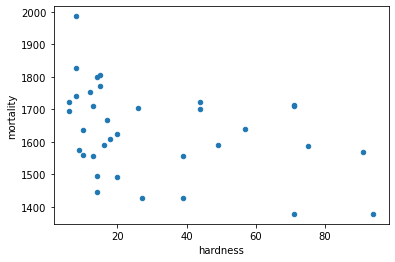

In [107]:
#визуализация взаимосвязи жесткости воды и смертности в северных городах Англии и Уэльса. Смертность также выше тем, чем ниже жесткость воды.
df_north.plot(kind='scatter', x='hardness', y='mortality')

In [108]:
# взаимосвязь также обратная отрицательная
display(df_north.corr())
display(df_north.corr(method = 'spearman'))

,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,-0.103548,0.309195
mortality,-0.103548,1.000000,-0.368598
hardness,0.309195,-0.368598,1.000000


,Unnamed: 0,mortality,hardness
Unnamed: 0,1.000000,-0.109812,0.222145
mortality,-0.109812,1.000000,-0.404208
hardness,0.222145,-0.404208,1.000000


In [117]:
c = df_north[['hardness']]
d = df_north['mortality']

In [118]:
c_train, c_test, d_train, d_test = train_test_split(c, d, test_size=0.30, random_state=21)

In [119]:
model = LinearRegression()
model.fit(c_train, d_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [120]:
d_pred = model.predict(c_test)
d_pred

array([1541.58619467, 1626.66569618, 1573.91640524, 1677.71339708,
       1667.5038569 , 1667.5038569 , 1657.29431672, 1672.60862699,
       1618.15774602, 1655.59272669, 1677.71339708])

<AxesSubplot:xlabel='hardness', ylabel='остатки'>

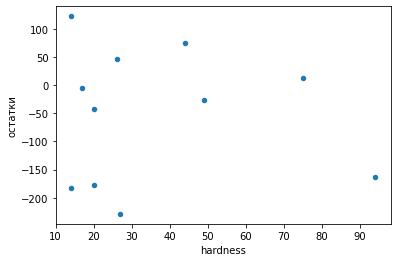

In [121]:
#остатки
res_df = c_test.copy()
res_df['d_pred'] = d_pred
res_df['d_test'] = d_test
res_df['остатки'] = res_df['d_test'] - res_df['d_pred']
res_df
res_df.plot(kind='scatter', x='hardness', y ='остатки')

In [122]:
model.score(c_test, d_test) #коэффициент детерминации 

-0.01162242144322212

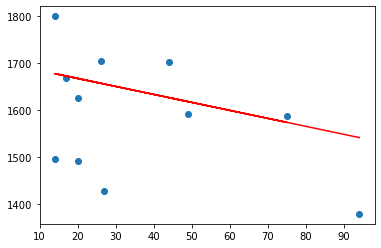

In [123]:
# линия регрессии
plt.scatter(c_test, d_test)
plt.plot(c_test, d_pred, c='r')

В северных городах как раз взаимосвязь смертности и мягкой воды видна четче.